# Encontrando Padrões Ocultos

**Conceito:** Nós entregamos os dados ao algoritmo e dizemos: "Eu não sei o que procurar, mas encontre <br>
estruturas, grupos ou padrões interessantes para mim".

## Clusterização

Uma empresa de varejo quer entender sua base de clientes. Ela pode usar clustering para criar segmentos <br>
de clientes (ex: "clientes de alto valor", "compradores esporádicos", "caçadores de promoções") com base em <br>
seu histórico de compras, sem saber previamente quais são esses grupos.

### Algoritmo K-Means

**Conceito:** Imagine que você tem uma sala cheia de pessoas (seus dados) e você quer <br>
formar K grupos. O K-Means funciona assim:<br>
<br>
1.	Ele coloca K "líderes de grupo" (chamados de centroides) em posições aleatórias na sala.<br>
2.	Cada pessoa na sala se junta ao líder de grupo que estiver mais perto dela.<br>
3.	Cada líder, então, se move para o centro do seu próprio grupo recém-formado.<br>
4.	Os passos 2 e 3 são repetidos até que os líderes não precisem mais se mover. Os grupos estão formados!<br>


C:\Users\crami\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


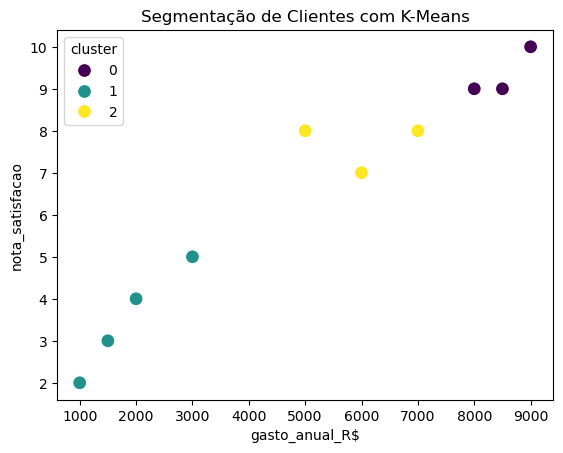

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans



# 1. Criando dados de exemplo: clientes por gasto anual e nota de satisfação (de 1 a 10)
clientes = pd.DataFrame({
    'gasto_anual_R$': [5000, 1500, 8000, 9000, 2000, 6000, 7000, 3000, 1000, 8500],
    'nota_satisfacao': [8, 3, 9, 10, 4, 7, 8, 5, 2, 9]
})

# 2. Criando e treinando o modelo K-Means. Queremos encontrar 3 grupos (K=3).
modelo_kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
modelo_kmeans.fit(clientes)

# 3. Vendo a qual grupo cada cliente pertence
clientes['cluster'] = modelo_kmeans.labels_

# Visualizando os clusters
sns.scatterplot(data=clientes, x='gasto_anual_R$', y='nota_satisfacao', hue='cluster', palette='viridis', s=100)
plt.title('Segmentação de Clientes com K-Means')
plt.show()


In [10]:
print(clientes.groupby('cluster').mean())


         gasto_anual_R$  nota_satisfacao
cluster                                 
0                8500.0         9.333333
1                1875.0         3.500000
2                6000.0         7.666667
